In [7]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%run modules.ipynb

In [9]:
# DATA_PATH = '\\Users\\Matan\\Desktop\\Avito'
# HELPER_DATA_PATH = 'C:\\Users\\Matan\\Google Drive\\ds-workshop\\Avito\\helper_data'
DATA_PATH = os.path.join('C:\\','Users', 'Matan', 'Desktop', 'Avito')
HELPER_DATA_PATH = os.path.join('C:\\','Users', 'Matan', 'Google Drive', 'ds-workshop', 'Avito', 'helper_data')

## Feature enrichment

In [29]:
do_enrich = True
save_enriched = False

if do_enrich:
    print('loading data...')
    train, test = load_data(DATA_PATH)    
    train = basic_enrichment(train, helper_data_path=HELPER_DATA_PATH)
    test = basic_enrichment(test, helper_data_path=HELPER_DATA_PATH)
    train, test = image_enrichment(train, test, helper_data_path=HELPER_DATA_PATH)
    train, test = nlp_enrichment(train, test, helper_data_path=HELPER_DATA_PATH)
    train, test = aggregated_features(train, test, helper_data_path=HELPER_DATA_PATH)
    train = data_cleaning(train)
    test = data_cleaning(test)
    
    if save_enriched:
        print('saving enriched df as files for next use...')
        save_df(train, HELPER_DATA_PATH, 'train_enriched_2.csv.gz', compression='gzip')
        save_df(test, HELPER_DATA_PATH, 'test_enriched_2.csv.gz', compression='gzip')
else:
    train = load_df(HELPER_DATA_PATH, 'train_enriched_2.csv.gz')
    test = load_df(HELPER_DATA_PATH, 'test_enriched_2.csv.gz')

loading data...
adding basic enrichment...
adding basic enrichment...
Adding image features enrichment...
Adding nlp features enrichment...
loading tfidf features...
Adding aggregated features enrichment...
Data cleaning...
Data cleaning...


In [30]:
list(train.columns)
list(test.columns)

['item_id',
 'user_id',
 'region',
 'city',
 'parent_category_name',
 'category_name',
 'param_1',
 'param_2',
 'param_3',
 'title',
 'description',
 'price',
 'item_seq_number',
 'activation_date',
 'user_type',
 'image',
 'image_top_1',
 'day',
 'weekday',
 'user_ads_count',
 'log_price',
 'log_seq_num',
 'param123',
 'title_description',
 'img_size',
 'img_sharpness',
 'img_luminance',
 'img_colorfulness',
 'img_confidence',
 'title_word_count',
 'description_non_regular_chars_ratio',
 'description_word_count',
 'merged_params_word_count',
 'title_svd_1_ngram',
 'title_svd_2_ngram',
 'title_svd_3_ngram',
 'title_svd_4_ngram',
 'title_svd_5_ngram',
 'title_svd_6_ngram',
 'title_svd_7_ngram',
 'title_svd_8_ngram',
 'title_svd_9_ngram',
 'title_svd_10_ngram',
 'title_svd_11_ngram',
 'title_svd_12_ngram',
 'title_svd_13_ngram',
 'title_svd_14_ngram',
 'title_svd_15_ngram',
 'title_svd_16_ngram',
 'title_svd_17_ngram',
 'title_svd_18_ngram',
 'title_svd_19_ngram',
 'title_svd_20_ngram',


#### Preparing data for Learn and Test

Add more features

In [31]:
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
import string
for df in [train, test]:    
    for col in ['description', 'title']:
        df['num_words_' + col] = df[col].apply(lambda comment: len(comment.split()))
        df['num_unique_words_' + col] = df[col].apply(lambda comment: len(set(w for w in comment.split())))

#     df['words_vs_unique_title'] = df['num_unique_words_title'] / df['num_words_title'] * 100
#     df['words_vs_unique_description'] = df['num_unique_words_description'] / df['num_words_description'] * 100
    
    df['city'] = df['region'] + '_' + df['city']
    df['num_desc_punct'] = df['description'].apply(lambda x: count(x, set(string.punctuation)))


In [87]:
categorical_cols = [
    'user_id', 
    'region', 
    'city',
    'parent_category_name', 
    'category_name', 
    'image_top_1',
    'user_type',
    'param_1',
    'param_2',
    'param_3',
#     'day',
    'weekday'
]
numerical_cols = [
    'num_unique_words_title',
    'num_unique_words_description',
    'num_desc_punct',
    'img_size',
    'img_sharpness',
    'img_luminance',
    'img_colorfulness',
    'img_confidence',
#     'item_seq_number', 
    'log_seq_num',
#     'price',
    'log_price',
    'user_ads_count',
#     'days_up',
    'avg_days_up_user',
    'avg_times_up_user',
    'n_user_items',
#     'title_word_count',
#     'description_word_count',
    'merged_params_word_count',
    'description_non_regular_chars_ratio',
    'title_svd_1_ngram',
    'title_svd_2_ngram',
    'title_svd_3_ngram',
    'title_svd_4_ngram',
    'title_svd_5_ngram',
    'title_svd_6_ngram',
    'title_svd_7_ngram',
    'title_svd_8_ngram',
    'title_svd_9_ngram',
    'title_svd_10_ngram',
    'title_svd_11_ngram',
    'title_svd_12_ngram',
    'title_svd_13_ngram',
    'title_svd_14_ngram',
    'title_svd_15_ngram',
    'title_svd_16_ngram',
    'title_svd_17_ngram',
    'title_svd_18_ngram',
    'title_svd_19_ngram',
    'title_svd_20_ngram',
    'title_svd_21_ngram',
    'title_svd_22_ngram',
    'title_svd_23_ngram',
    'title_svd_24_ngram',
    'title_svd_25_ngram',
    'title_svd_26_ngram',
    'title_svd_27_ngram',
    'title_svd_28_ngram',
    'title_svd_29_ngram',
    'title_svd_30_ngram',
    'description_svd_1_ngram',
    'description_svd_2_ngram',
    'description_svd_3_ngram',
    'description_svd_4_ngram',
    'description_svd_5_ngram',
    'description_svd_6_ngram',
    'description_svd_7_ngram',
    'description_svd_8_ngram',
    'description_svd_9_ngram',
    'description_svd_10_ngram',
    'description_svd_11_ngram',
    'description_svd_12_ngram',
    'description_svd_13_ngram',
    'description_svd_14_ngram',
    'description_svd_15_ngram',
    'description_svd_16_ngram',
    'description_svd_17_ngram',
    'description_svd_18_ngram',
    'description_svd_19_ngram',
    'description_svd_20_ngram',
    'description_svd_21_ngram',
    'description_svd_22_ngram',
    'description_svd_23_ngram',
    'description_svd_24_ngram',
    'description_svd_25_ngram',
    'description_svd_26_ngram',
    'description_svd_27_ngram',
    'description_svd_28_ngram',
    'description_svd_29_ngram',
    'description_svd_30_ngram' 
]

feature_list = categorical_cols + numerical_cols

def categorical_indices(df, categorical_cols):
    return [i for i, col in enumerate(df.columns) if col in categorical_cols]

### Formatting for algorithm

#### Encoding Labels

In [33]:
import gc
gc.collect()
for col in categorical_cols:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train[col].values.astype('str')) + list(test[col].values.astype('str')))
    train[col] = lbl.transform(list(train[col].values.astype('str')))
    test[col] = lbl.transform(list(test[col].values.astype('str')))

#### Splitting data

In [88]:
X_df = train[feature_list].fillna(0)
y_df = train['deal_probability'].values
X_test_df = test[feature_list].fillna(0)
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)


# LightGBM

* https://github.com/Microsoft/LightGBM/tree/master/examples/python-guide
* https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

In [89]:
categorical_features_idx = categorical_indices(X_df, categorical_cols)
lgb_train = lgb.Dataset(X_train_df, label=y_train_df)
lgb_val = lgb.Dataset(X_val_df, y_val_df, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 15,
    'num_leaves': 32,
    'feature_fraction': 0.6,
    'learning_rate': 0.05,
    'verbose': 1
}

def train_lgb(my_params, my_lgb_train, my_lgb_val):
    evals_result = {}
    clf = lgb.train(my_params, 
                    my_lgb_train, 
                    num_boost_round=2000,
                    valid_sets=[my_lgb_train, my_lgb_val],
                    early_stopping_rounds=500,
                    feature_name=feature_list,
                    categorical_feature=categorical_features_idx,
                    evals_result=evals_result,
                    verbose_eval=200)
    return clf, evals_result

clf, evals_result = train_lgb(params, lgb_train, lgb_val)

Training until validation scores don't improve for 500 rounds.
[200]	training's rmse: 0.219733	valid_1's rmse: 0.22361
[400]	training's rmse: 0.215438	valid_1's rmse: 0.222051
[600]	training's rmse: 0.212755	valid_1's rmse: 0.221467
[800]	training's rmse: 0.210636	valid_1's rmse: 0.221135
[1000]	training's rmse: 0.208814	valid_1's rmse: 0.220906
[1200]	training's rmse: 0.207161	valid_1's rmse: 0.220796
[1400]	training's rmse: 0.205663	valid_1's rmse: 0.220718
[1600]	training's rmse: 0.204222	valid_1's rmse: 0.220658
[1800]	training's rmse: 0.202916	valid_1's rmse: 0.220606
[2000]	training's rmse: 0.201539	valid_1's rmse: 0.220591
Did not meet early stopping. Best iteration is:
[2000]	training's rmse: 0.201539	valid_1's rmse: 0.220591


In [90]:
def test_lgb(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_pred = np.clip(y_pred, 0, 1)
    res = rmse(y_pred, y_test)
    print(res)
    return res
gc.collect()
results = {}
results['lgbm'] = { 'rmse': test_lgb(clf, X_val_df, y_val_df) }

0.2204598362415262


### Analyzing results

Plot metrics during training...


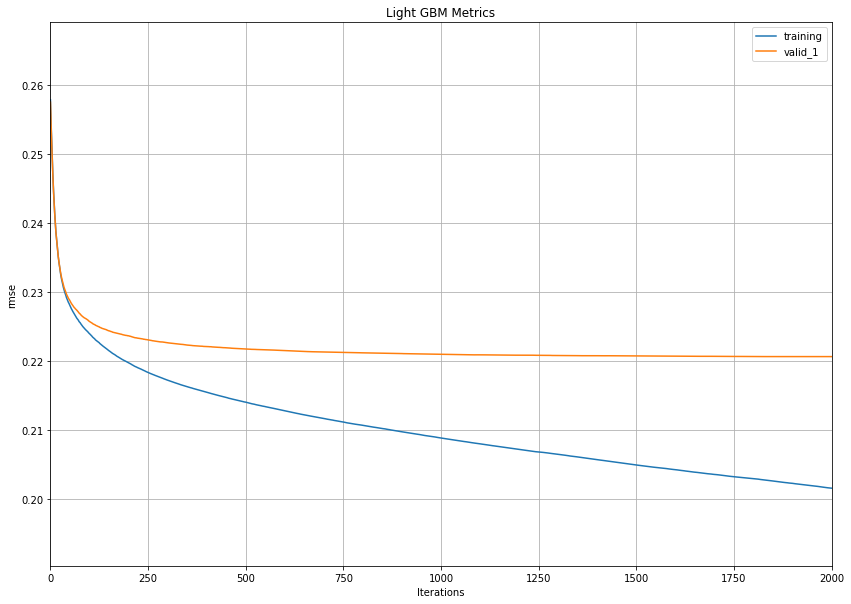

Plot feature importances...


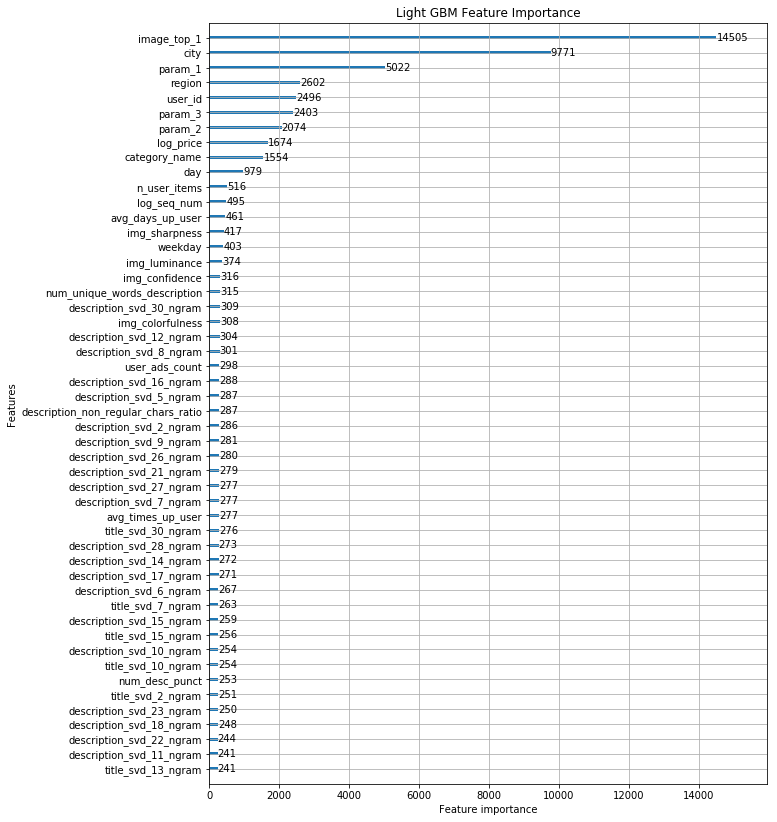

In [91]:
def analyze_lgbm_result():
    print('Plot metrics during training...')
    ax = lgb.plot_metric(evals_result, metric='rmse')
    plt.title("Light GBM Metrics")
    plt.show()

    print('Plot feature importances...')
    fig, ax = plt.subplots(figsize=(10, 14))
    lgb.plot_importance(clf, max_num_features=50, ax=ax)
    plt.title("Light GBM Feature Importance")
    plt.show()

#     print('Plot 84th tree...')  # one tree use categorical feature to split
#     ax = lgb.plot_tree(clf, tree_index=83, figsize=(20, 8), show_info=['split_gain'])
#     plt.show()

#     print('Plot 84th tree with graphviz...')
# #     graph = lgb.create_tree_digraph(clf, tree_index=83, name='Tree84')
# #     graph.render(view=True)
    
analyze_lgbm_result()

# Prediction Analysis

In [38]:
y_pred = clf.predict(X_val_df)

In [39]:
y_pred = np.clip(y_pred, 0, 1)
X_val_df['pred_dp'] = y_pred
X_val_df['real_dp'] = y_val_df
X_val_df['mistake'] = np.abs(y_val_df - y_pred)
bad_df = X_val_df.sort_values(by='mistake', ascending=False).iloc[:25000]
good_df = X_val_df.sort_values(by='mistake', ascending=True).iloc[:25000]

In [40]:
# display(good_df['price'].mean())
# display(bad_df['price'].mean())
# display(X_df['price'].mean())
# display(good_df['price'].median())
# display(bad_df['price'].median())
# display(X_df['price'].median())
display(good_df['log_price'].mean())
display(bad_df['log_price'].mean())
display(X_df['log_price'].mean())
display(good_df['log_price'].median())
display(bad_df['log_price'].median())
display(X_df['log_price'].median())

7.597078502358022

7.109267224122516

7.411649674200214

7.313886831633462

7.170888478512505

6.90875477931522

We might wish to predict high price and low price seperately

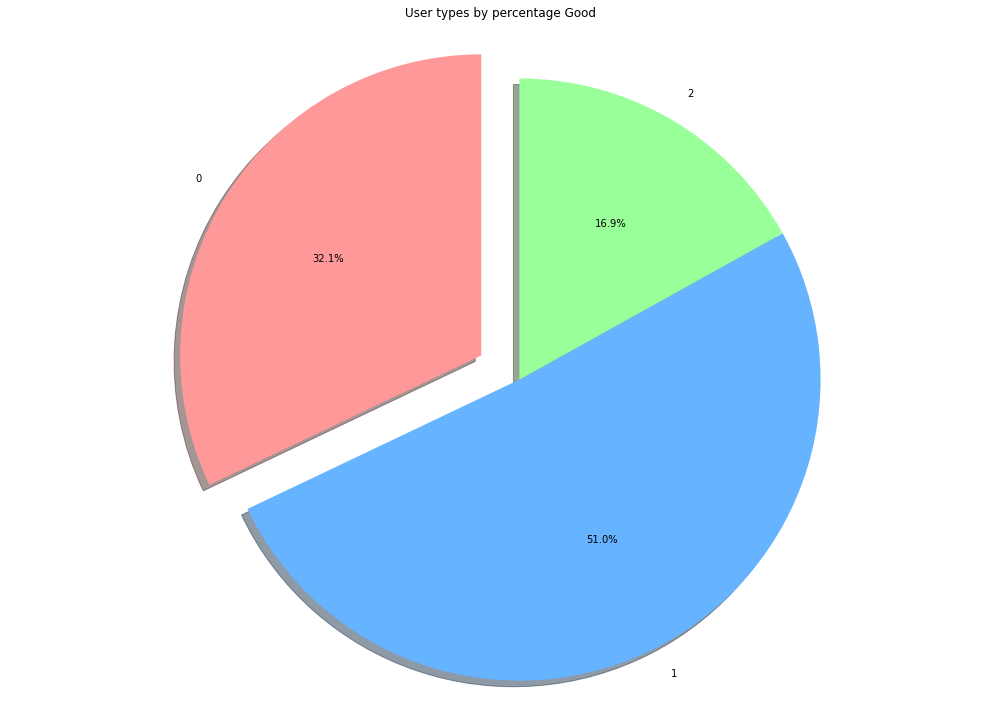

In [41]:
user_type_dist = good_df.groupby('user_type').size()
explode = (0.15, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('User types by percentage Good')
plt.show()

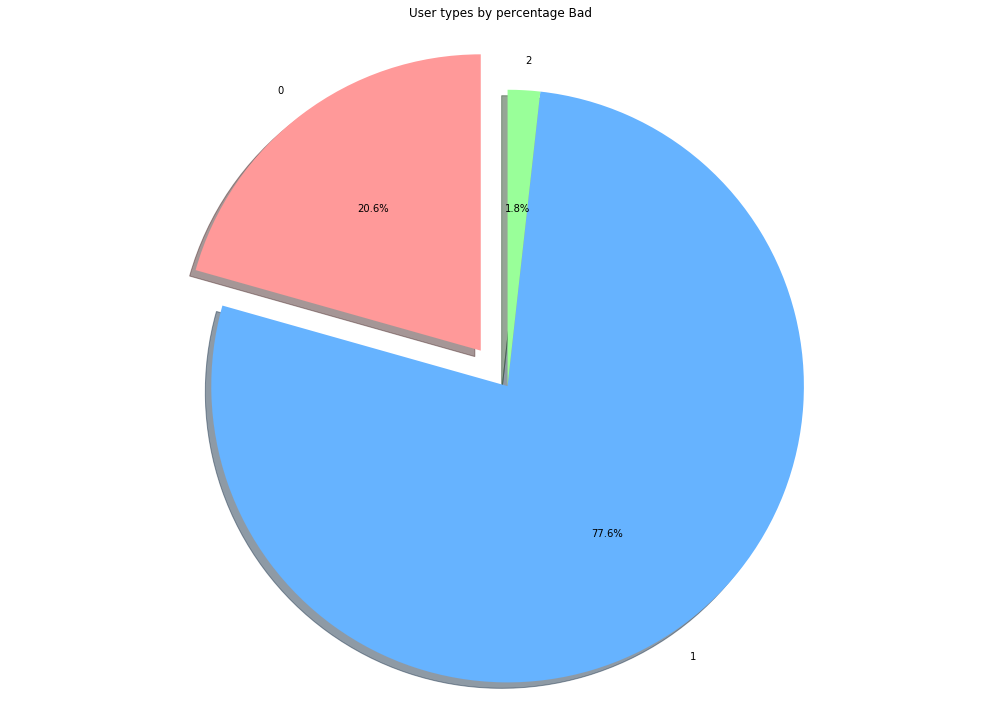

In [42]:
user_type_dist = bad_df.groupby('user_type').size()
explode = (0.15, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('User types by percentage Bad')
plt.show()

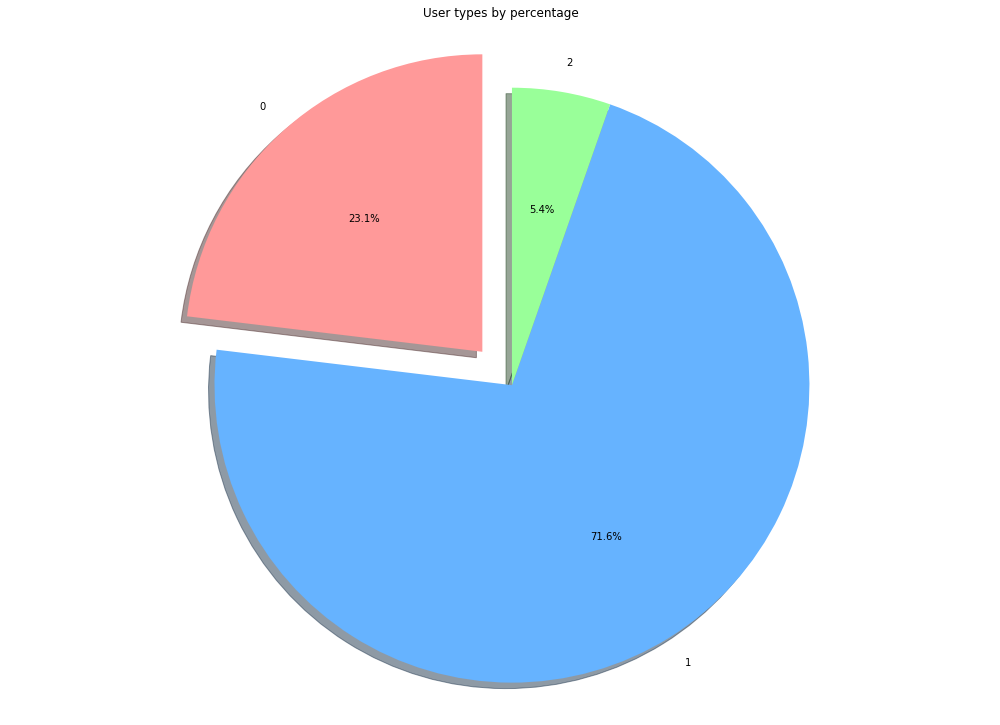

In [43]:
user_type_dist = X_df.groupby('user_type').size()
explode = (0.15, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('User types by percentage')
plt.show()

We can see that we have higher success rate on the smaller classes of user types

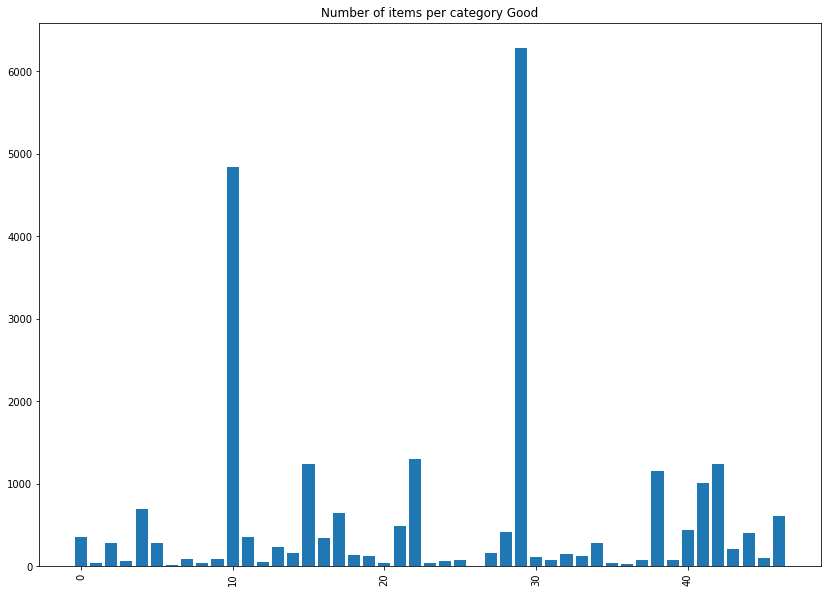

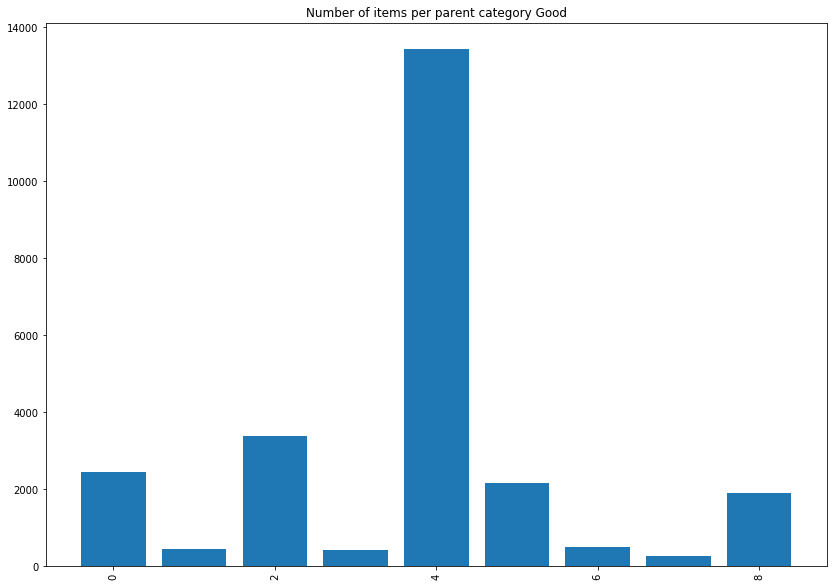

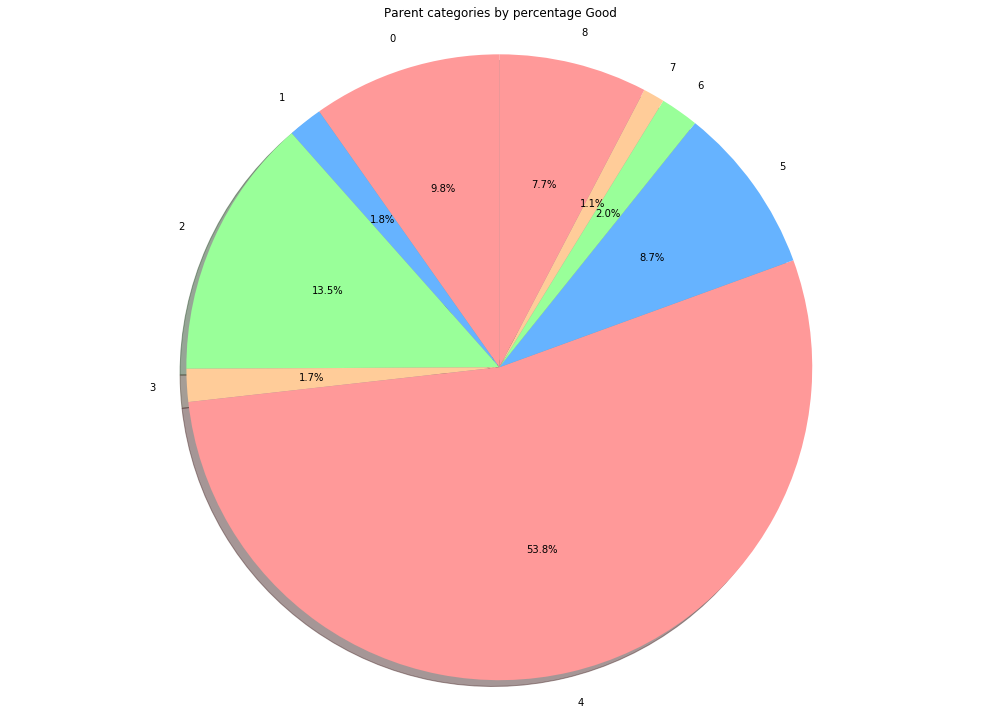

In [44]:
category_counts = good_df.groupby('category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per category Good')
plt.show()
category_counts = good_df.groupby('parent_category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per parent category Good')
plt.show()

parent_category_dist = good_df.groupby('parent_category_name').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = parent_category_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(parent_category_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Parent categories by percentage Good')
plt.show()

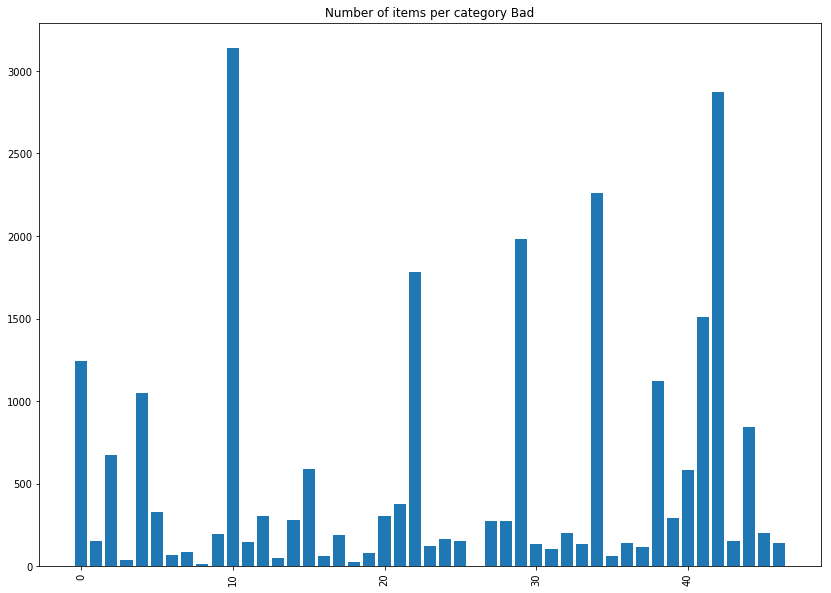

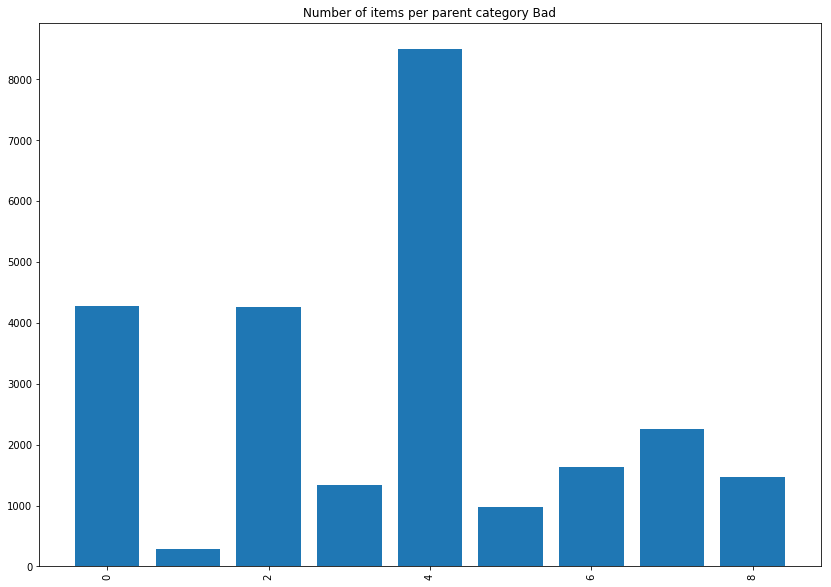

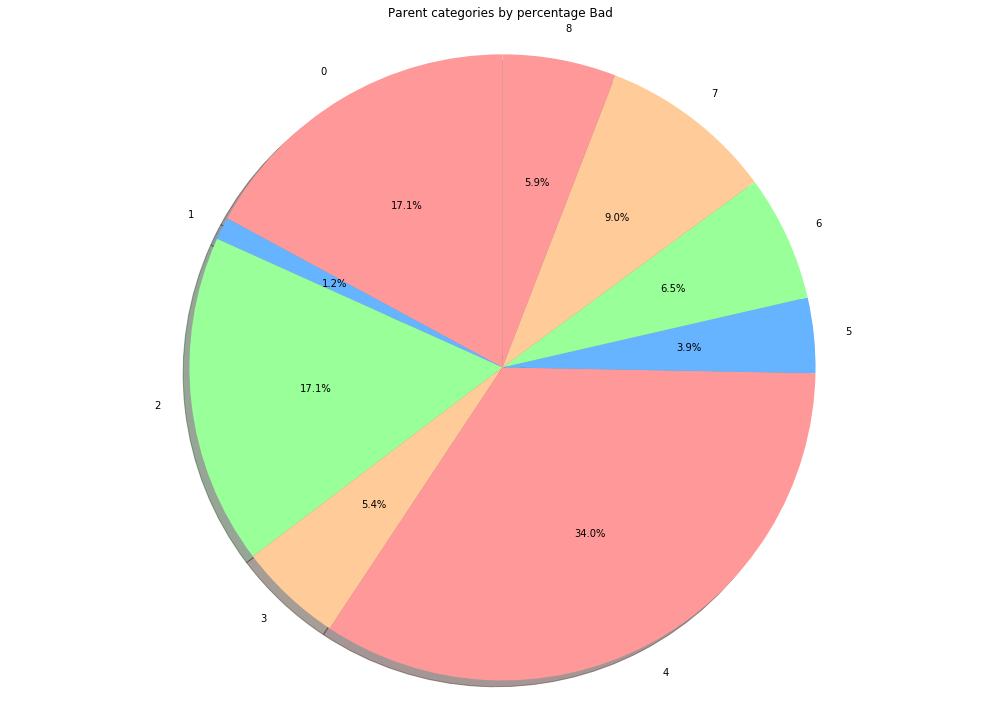

In [45]:
category_counts = bad_df.groupby('category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per category Bad')
plt.show()
category_counts = bad_df.groupby('parent_category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per parent category Bad')
plt.show()

parent_category_dist = bad_df.groupby('parent_category_name').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = parent_category_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(parent_category_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Parent categories by percentage Bad')
plt.show()

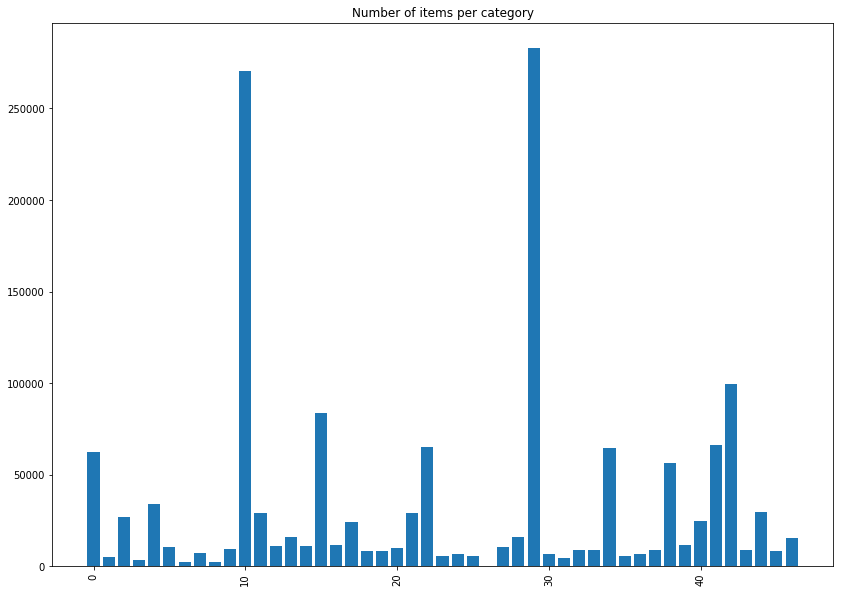

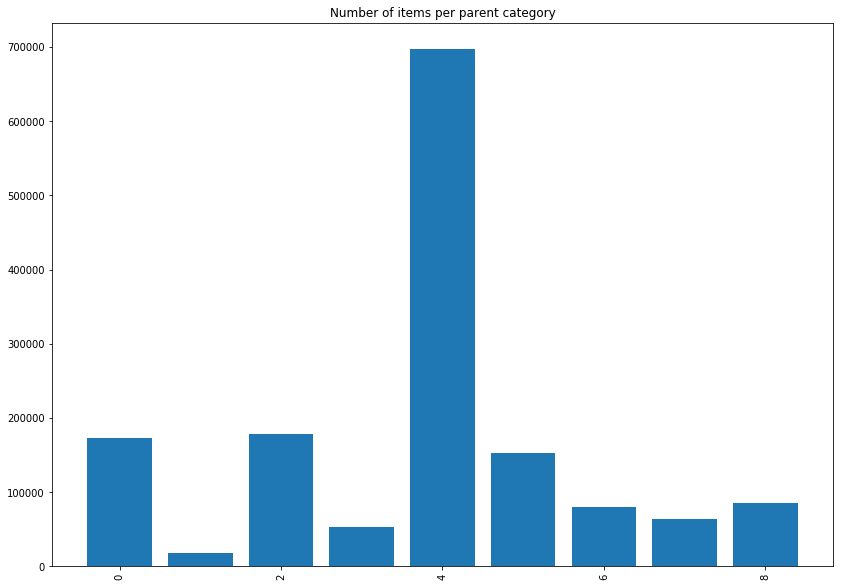

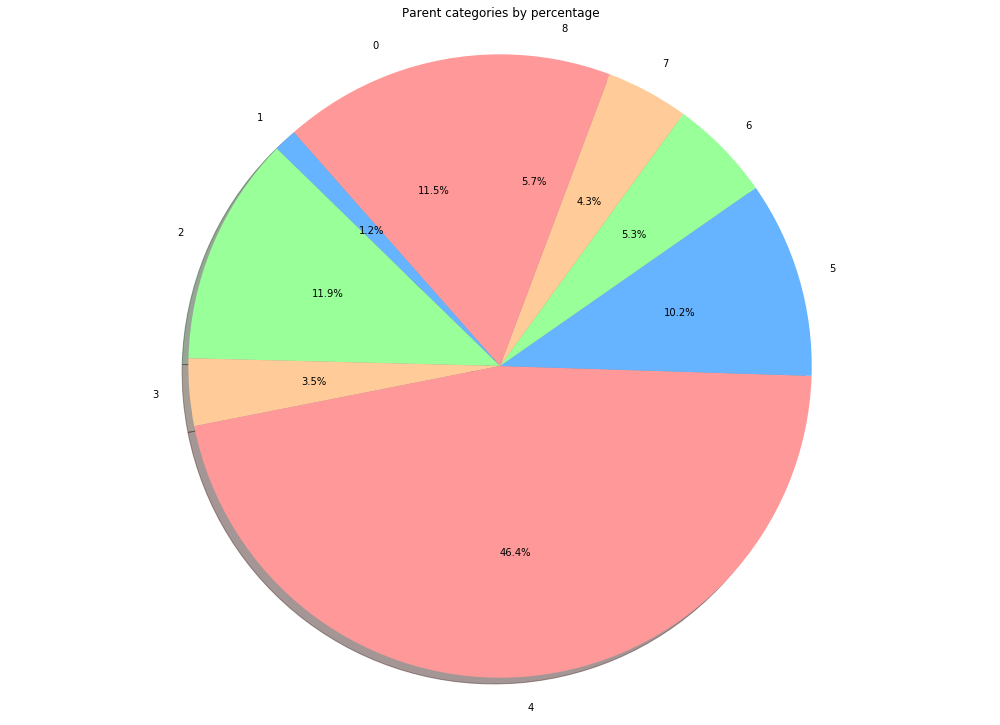

In [46]:
category_counts = X_df.groupby('category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per category')
plt.show()
category_counts = X_df.groupby('parent_category_name').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per parent category')
plt.show()

parent_category_dist = X_df.groupby('parent_category_name').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = parent_category_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(parent_category_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Parent categories by percentage')
plt.show()

We don't predict well categories 0,2

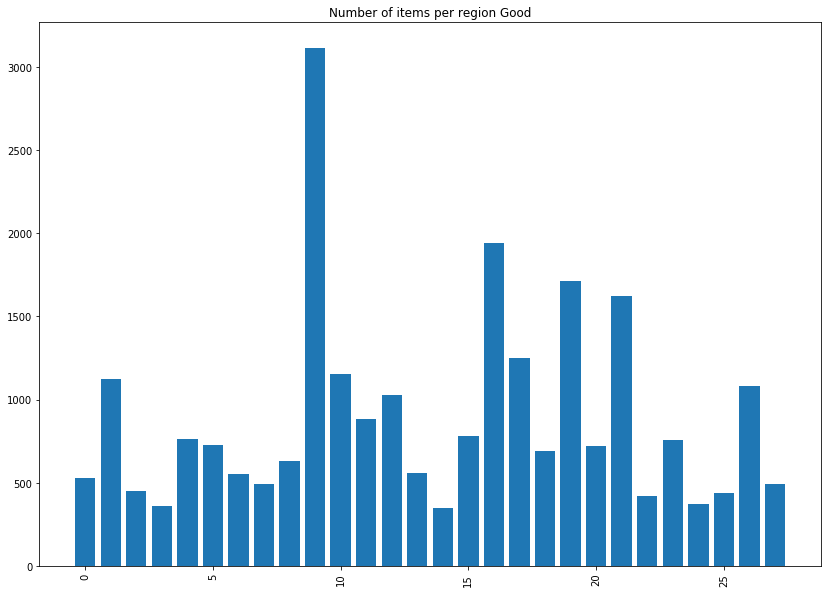

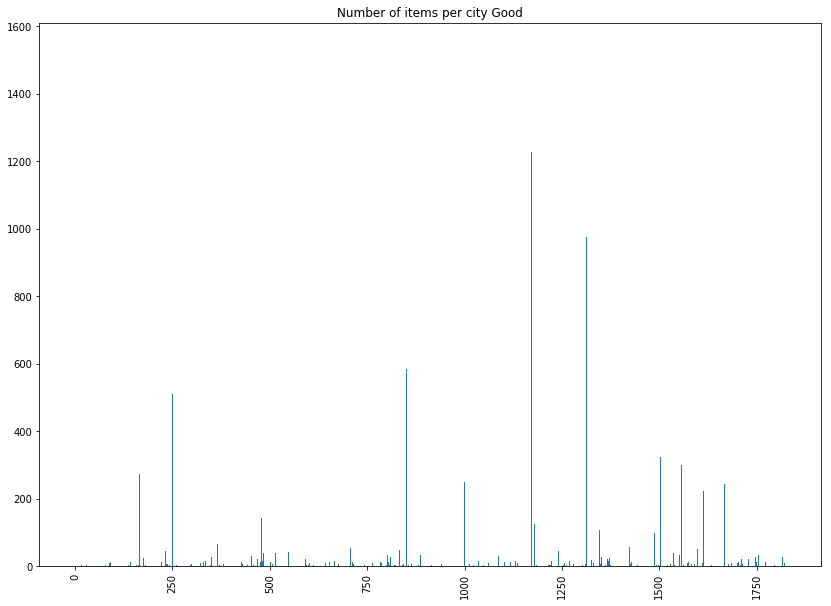

In [47]:
region_counts = good_df.groupby('region').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(region_counts.index, region_counts.values)
plt.title('Number of items per region Good')
plt.show()
city_counts = good_df.groupby('city').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(city_counts.index, city_counts.values)
plt.title('Number of items per city Good')
plt.show()

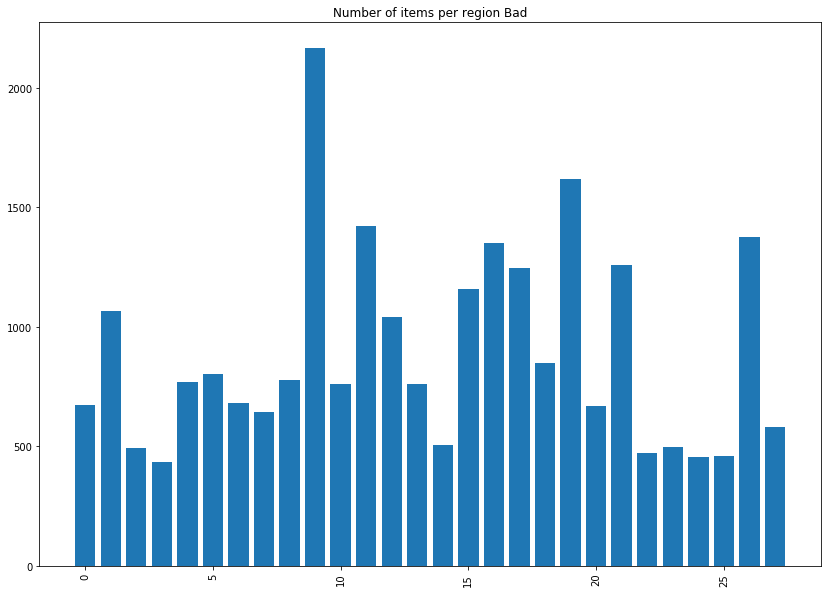

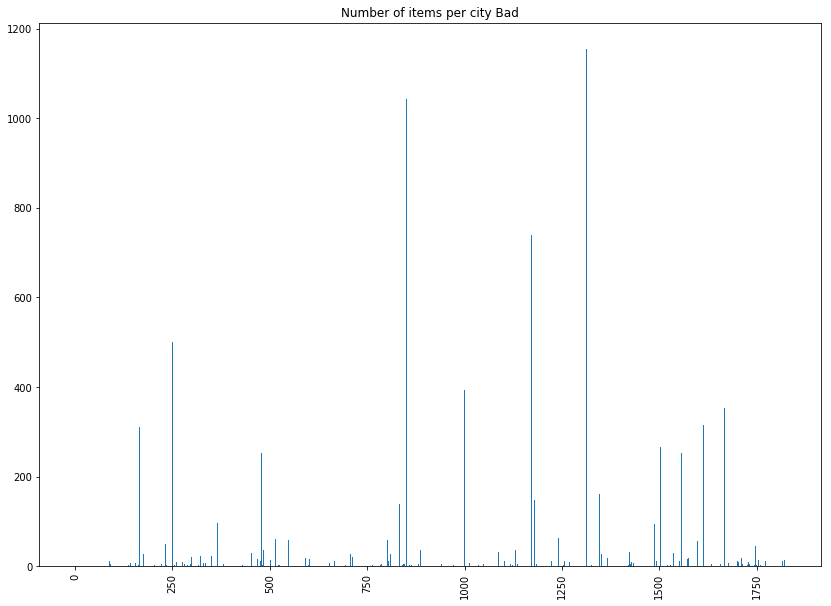

In [48]:
region_counts = bad_df.groupby('region').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(region_counts.index, region_counts.values)
plt.title('Number of items per region Bad')
plt.show()
city_counts = bad_df.groupby('city').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(city_counts.index, city_counts.values)
plt.title('Number of items per city Bad')
plt.show()

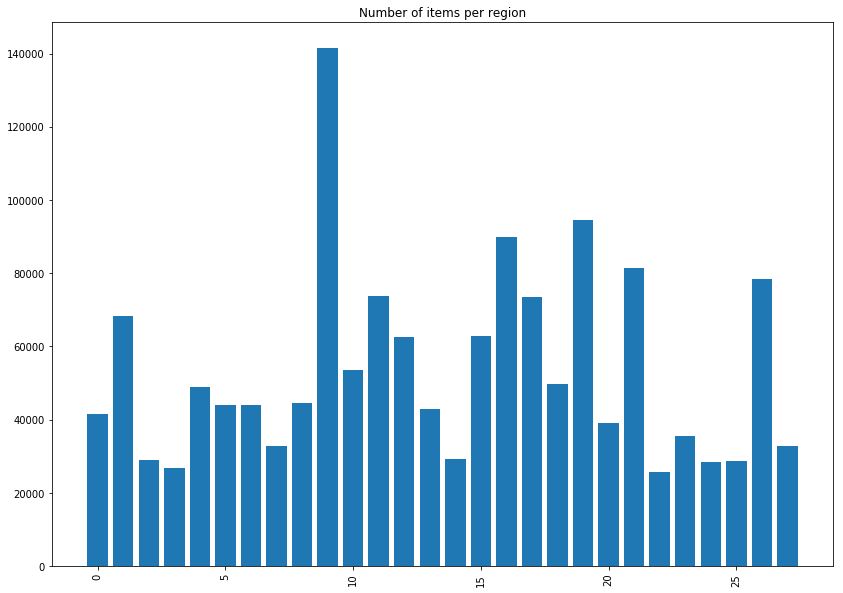

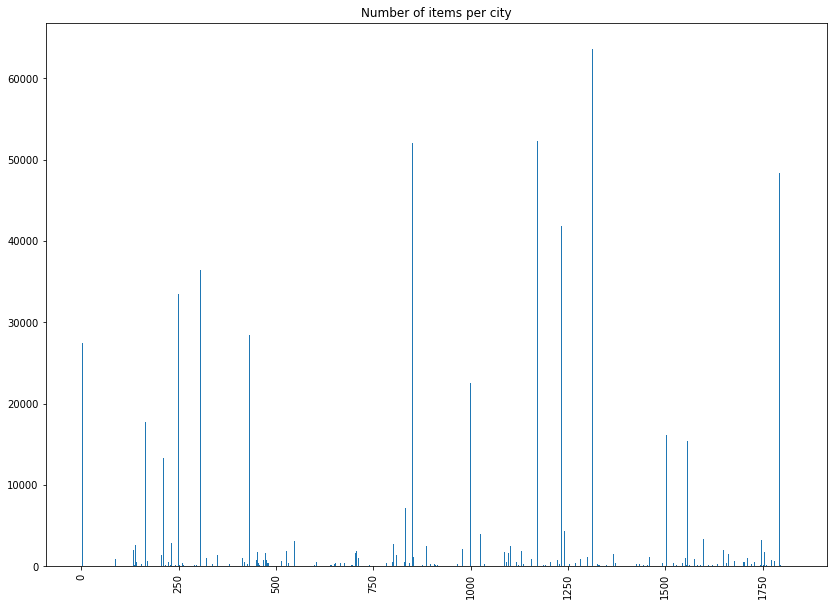

In [49]:
region_counts = X_df.groupby('region').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(region_counts.index, region_counts.values)
plt.title('Number of items per region')
plt.show()
city_counts = X_df.groupby('city').size().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(city_counts.index, city_counts.values)
plt.title('Number of items per city')
plt.show()

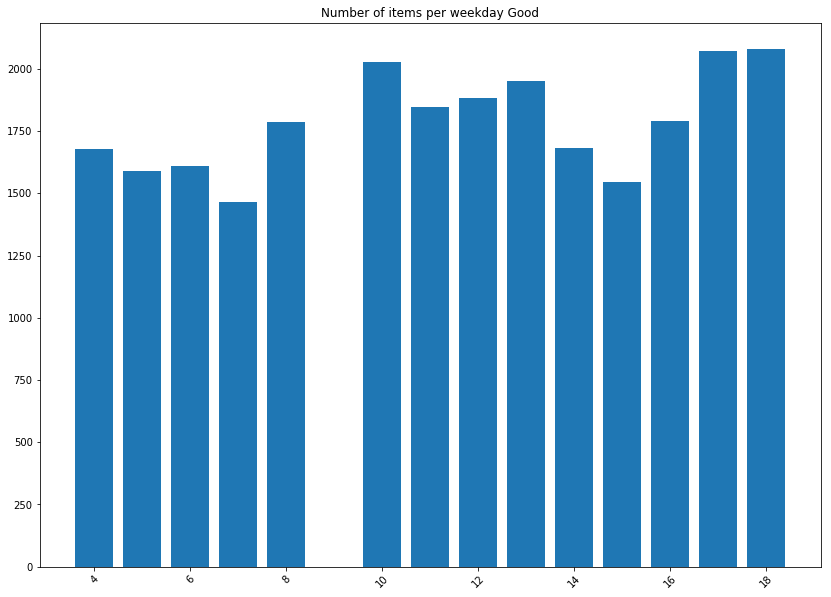

In [50]:
weekday_counts = good_df.groupby('day').size().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(weekday_counts.index, weekday_counts.values)
plt.title('Number of items per weekday Good')
plt.show()

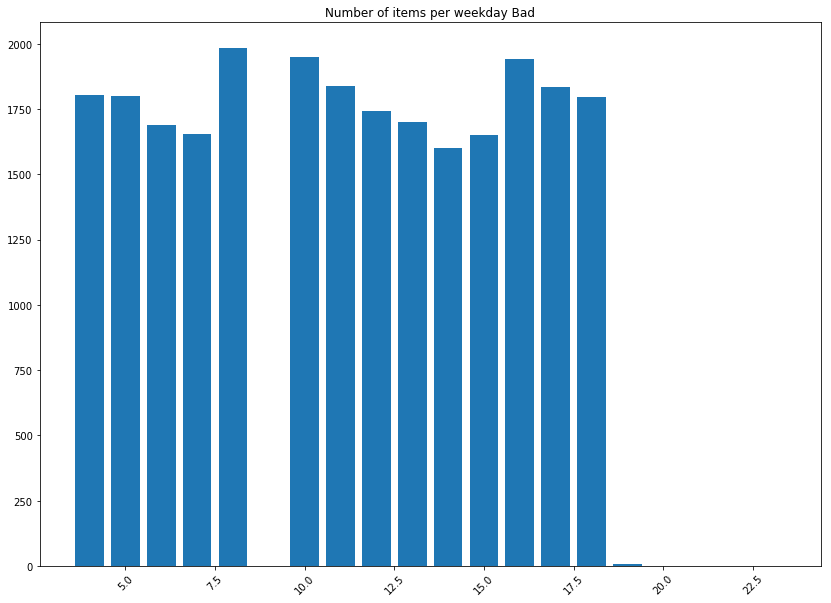

In [51]:
weekday_counts = bad_df.groupby('day').size().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(weekday_counts.index, weekday_counts.values)
plt.title('Number of items per weekday Bad')
plt.show()

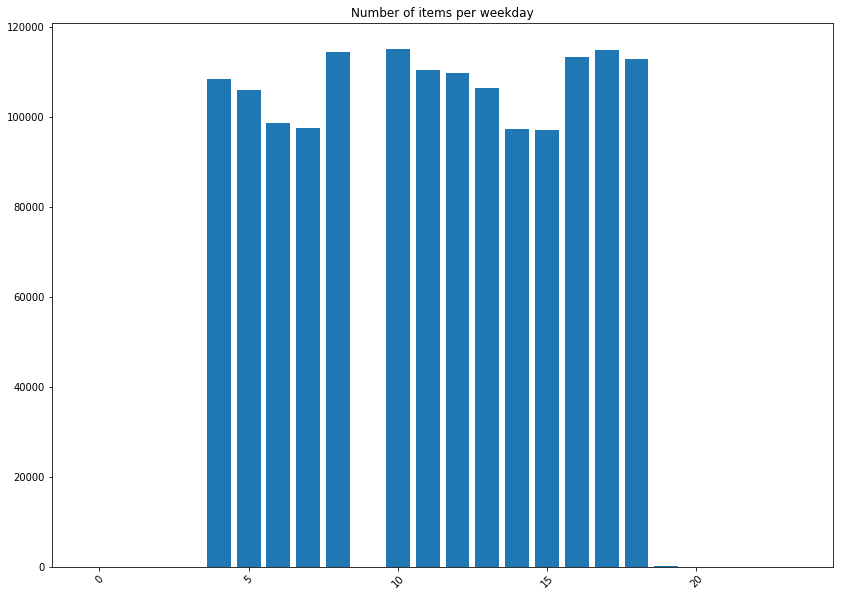

In [52]:
weekday_counts = X_df.groupby('day').size().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(weekday_counts.index, weekday_counts.values)
plt.title('Number of items per weekday')
plt.show()

### Get Submission Result

In [92]:
y_pred = clf.predict(X_test_df)
y_pred = np.clip(y_pred, 0, 1)

In [93]:
res_df = pd.DataFrame(test['item_id'])
res_df['deal_probability'] = y_pred

In [94]:
display(res_df.head())

,item_id,deal_probability
0,6544e41a8817,0.157821
1,65b9484d670f,0.166703
2,8bab230b2ecd,0.211601
3,8e348601fefc,0.113002
4,8bd2fe400b89,0.276038


In [95]:
res_df.to_csv('submissions/submit_res_matan_10.csv.gz', index=None, compression='gzip')